# Empalme con la clase anterior.

# Sistemas de Recomendacion:
Estos sistemas son de los mas productivo en la economia de ventas. En 2021 el 80% (mas o menos) de gente que miraba una pelicula lo hacia por recomendaciones del mismo Netflix.

Estos sistemas son semi-supervisados.

Ejemplos (aplicaciones)

* Seleccionar canciones en Spotify
* Mostrar avisos en facebook, gmail, etc.
* Amazon (libros, peliculas, AWS)
* Netflix.
* y muchos mas.

Vamos a estudiar dos casos:

1. Recomdaciones basadas en contenido
El contenido se conoce plenamente. Que es contenido?
* romance
* horror
* thriller
* comedia
2. Collaborative filtering (filtrado colaborativo)
No se conoce el contenido.

Antes de terminar incluyo una grafica que nos va a guiar en la proxima clase.




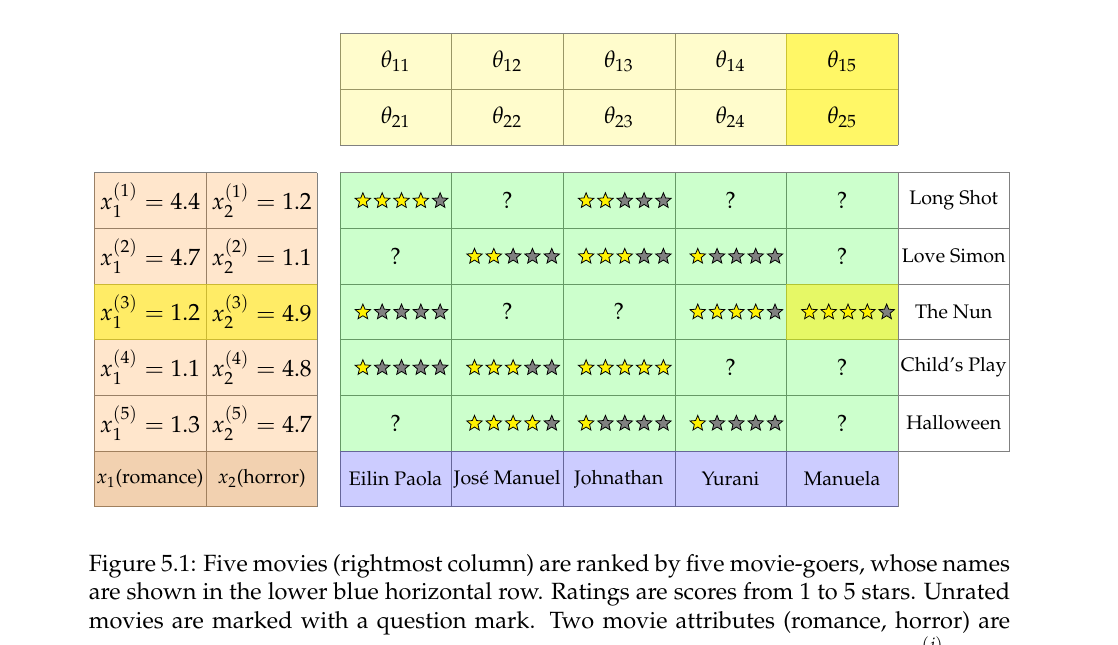

Quantificamos los datos en la tabla Figure 5.1

Dimensiones de los datos:

* $n_f$ numero de "features" (contenidos) (2)
* $n_u$ numero de usuarios (5)
* $n_m$ numero de "movies" (peliculas)

Dimensiones de la informacion

$$ X \in \mathbb{R}^{n_m \times n_f} $$
$$ \Theta \in \mathbb{R}^{n_f \times n_u} $$
$$ Y \in \mathbb{R}^{n_m \times n_u} $$




Como siempre

$$y_{ij} = (x^{(i)})^T \Theta_j $$

En el caso de el resaltado amarillo tenemos

$$y_{35} = x_1^{(3)} \theta_{15} + x_2^{(3)} \theta_{25}=4.0 $$

Debemos, como siempre, obtener dos cosas:

1. Funcion de costo.
2. El gradiente de la funcion de costo.

## Funcion de costo

$$J_{\Theta} = \frac12 \| Y - X \Theta \|_F^2 + \frac{\lambda}{2} \| \Theta \|_F^2 \tag{1} $$


Profe, que hacemos con las interrogaciones ?

Para las interrogaciones definimos una matrix (tensor) auxiliar

\begin{eqnarray}
r_{ij} =
\left \{
    \begin{array}{cc}
    1 & \text{si la pelicula $i$ fue calificada por el usuario $j$} \\
    0 & \text{si la pelicula $i$ no fue calificada por el usuario $j$} \\
    \end{array}
\right .   
\end{eqnarray}
Ahora cambiamos la funcion de costo  (1) por

$$J_{\Theta} = \frac12 \| R \circ (Y - X \Theta) \|_F^2 + \frac{\lambda}{2} \| \Theta \|_F^2 \tag{2} $$
con $R=(r_{ij})$

Este problema se resuelve como se hizo, por ejemplo, en regresion lineal.

## Gradiente:
No lo voy a hacer, voy a calcular otro mas interesante mas adelante. (se deja como ejercicio).

# Collaborative Filtering.
Vamos a asumir, por el momento que conocemos $\Theta$ y queremos averiguar $X$ .



$$J_{X} = \frac12 \| R \circ (Y - X \Theta) \|_F^2 + \frac{\lambda}{2} \| X \|_F^2 \tag{3} $$
con $R=(r_{ij})$


Hay un problema mas interesante. Que tal si ignoramos no solo los $X$ sino los $\Theta$ ?
Ver grafica siguiente.





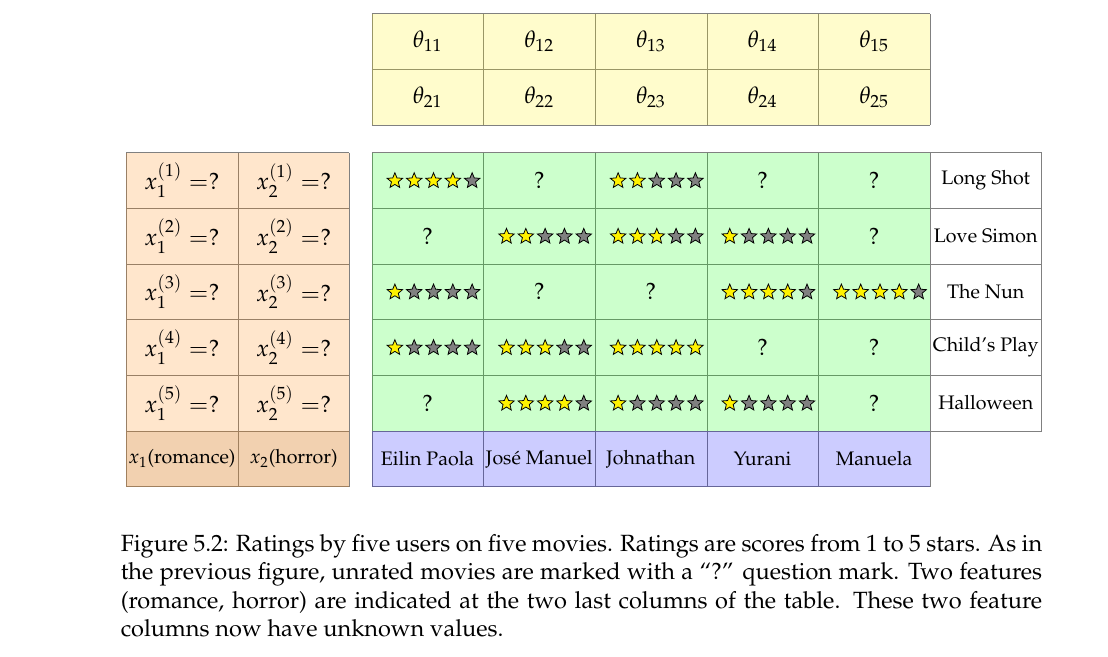

Como resolvemos este problema?
Existen varias tecnicas.

1.
    * Inicialmente podemos comenzar asumiendo un $X_1$ aleatorio
y hallamos $\Theta_1$ con la funcion de costo (1).
    * Luego entonces hallamos el nuevo $X_2$ con $\Theta_1$ usando
la funcion de costo (2),
    * regresamos  a encontrar $\Theta_2$ con la funcion de costo (1)

    * En resumen encontramos $X_i, \Theta_i$ a partir de un $X_1$ aleatorio siguiento la siguiente secuencia:

    $$X_1 \to \Theta_1 \to X_2 \to \cdots \to X_n \to \Theta_n $$

    * Si el sistema converge (se puede calcular un error. La misma funcion de costo sirve para estimar esto ). Entonces
    se para depues de alguna interacion $n$.

2. Podemos definir una funcion de costo (4)  que combine ambas variables $X, \Theta$. Combinamos las funciones de costo (2) y (3).

$$J = J(\Theta, X) = \frac12 \| R \circ ( Y - X \theta)\|_F^2 + \frac{\lambda}{2} \left ( \| \Theta \|_F^2  + \| X \|_F^2  \right ) $$
Se resuelve para $\Theta, X$ simultaneamente.



$$J = \frac12 \sum_{i=1}^{n_m} \sum_{j=1}^{n_u} r_{ij}
\left (   
    y_{ij} - \sum_{k=1}^{n_f} x_{ik} \theta_{kj}
\right )^2 + \frac{\lambda}{2}
\left (
    \sum_{i=1}^{n_f} \sum_{j=1}^{n_u} \theta_{ij}^2 +
    \sum_{i=1}^{n_m} \sum_{j=1}^{n_f} x_{ij}^2
\right )  $$

Necesitamos: gradiente de $J$ ($\nabla_{\Theta, X} J$)
comencemos con gradiente de $J$ ($\nabla_{X} J$)
(gradiente=derivadas parciales)

\begin{eqnarray}
\frac{\partial J}{\partial x_{st}} &=& \sum_{i=1}^{n_m}
\sum_{j=1}^{n_u} r_{ij}
\left (
    \sum_{k=1}^{n_f} x_{ik} \theta_{kj} - y_{ij}
\right ) \sum_{p=1}^{n_f} \theta_{pj} \delta_{is} \delta_{pt} + \lambda  \sum_{i=1}^{n_m} \sum_{j=1}^{n_f} x_{ij} \delta_{is} \delta_{jt}  \\
&=& \sum_{j=1}^{n_u} r_{sj} \left (
    \sum_{k=1}^{n_f} x_{sk} \theta_{kj} - y_{sj}
    \right ) \theta_{tj}
    + \lambda x_{st}
\end{eqnarray}

Este es el resultado. En forma matricial

$$ \nabla_X J = [ R \circ (X \Theta - Y) \Theta^T ] + \lambda X $$

Se le pide al estudiantte qu pruebe

$$ \nabla_\Theta J = X^T [ R \circ (X \Theta - Y) ] + \lambda \Theta $$

Como es el "rating"

$$\text{rating}_{ij}  = (X^{(i)})^T \Theta_j $$


Otra forma como Netflix podria enviar mensajes a usuarios es la siguiente.  Tome la distancia (metrica de Frobenious) entre dos
peliculas

$$\|X^{(i)} - X^{(j)}   \|  $$
si la distancia es muy pequenha y a Fulanito le gusto la pelicula $i$, le puede mandar un mensaje diciendo "te puede gustar la pelicula $j$".

## Mean normalization (normalizacion por la media).
Asuma que Eilin Paola no quiso calificar ninguna pelicula.
Por ejemplo



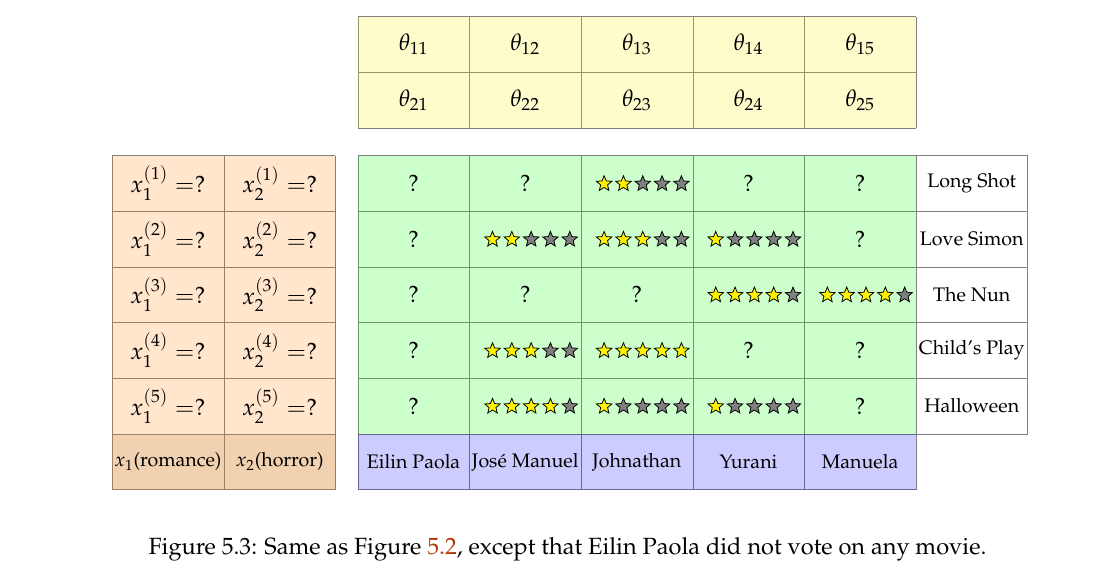

Que pasa con esto? es malo?

Como $r_{ij}=0$ para todos los $i$ de la pelicula $j$ (toda una columna). Para Eilin Paola

$$J^{(j_0)} = \frac{\lambda}{2} \left ( \| \Theta_{j_0} \|_F^2 + \| X \|_F^2 \right ) $$

Ahora cual es el minimo de esto? cuando $\Theta_{j_0}=0$
Si $\Theta_{j_0}=0$ entonces, recuerden las predicciones

$$Y^{(ij_0)} = {X^{(i)}}^T \Theta_{i j_0} = 0 $$

El problema se arregla de la siguiente forma:

1. Le restamos la media (por filas, por pelicula)a cada etiqueta $y_{ij}$ . Es decir
$$y_{ij} \to  y_{ij}- \mu_i $$
2. Resolvemos el problema para la nueva tabla.
3. Sumamos la media a cada elemento de la tabla.
$$y_i \to y_{ij} + \mu_i  $$

Observemos la siguiente grafica.

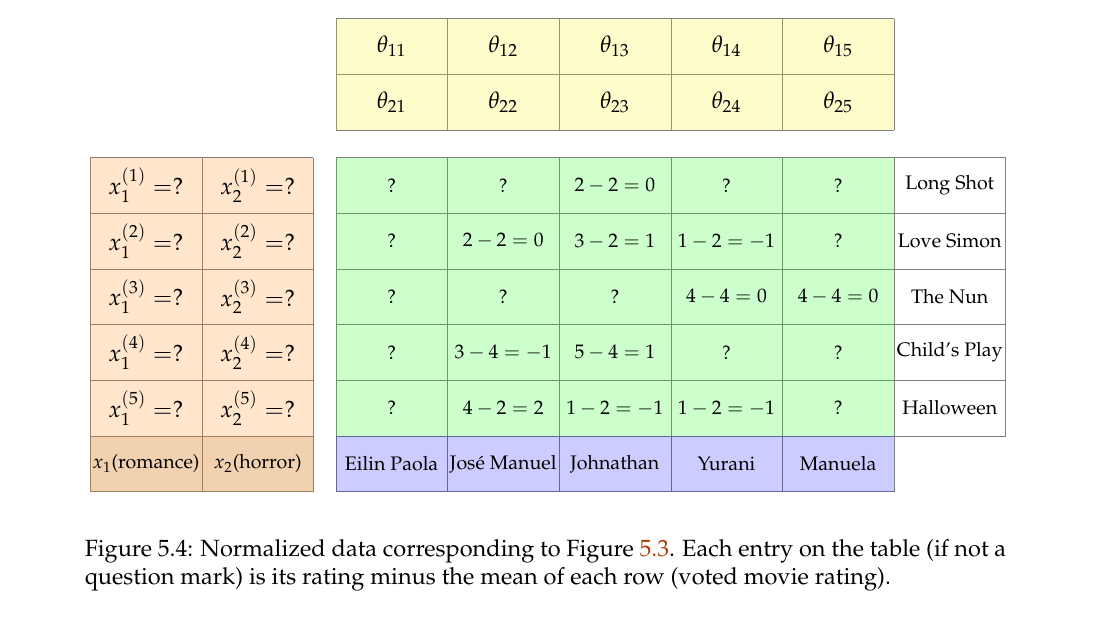